In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [13]:
img = cv2.imread('opencv.png')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgray = 255-imgray

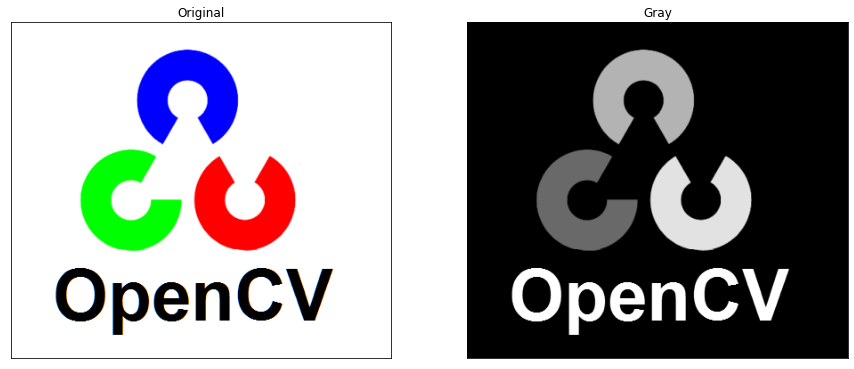

In [14]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgray,cmap = 'gray')
plt.title('Gray'), plt.xticks([]), plt.yticks([])
plt.show()

In [16]:
ret,thresh = cv2.threshold(imgray,8,255,cv2.THRESH_BINARY)

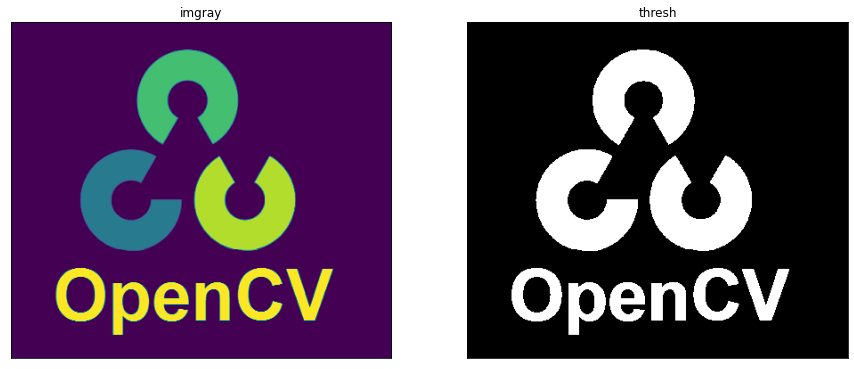

In [10]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgray)
plt.title('imgray'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(thresh,cmap = 'gray')
plt.title('thresh'), plt.xticks([]), plt.yticks([])
plt.show()

In [17]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [27]:
imgcontour= cv2.drawContours(img,contours, -1,(255,32,32),2)
img = cv2.imread('opencv.png')

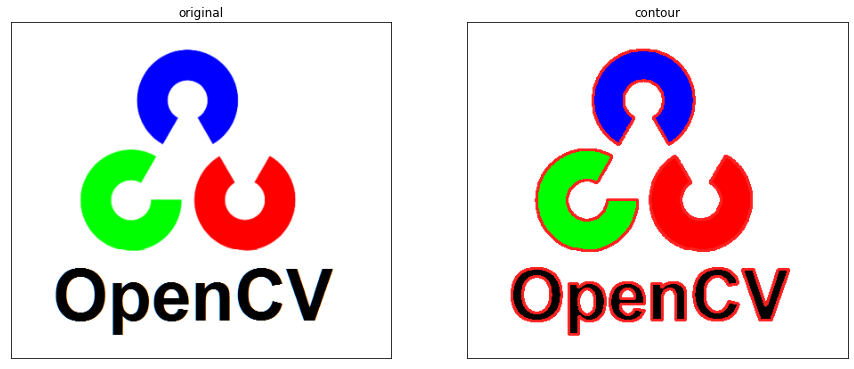

In [28]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('contour'), plt.xticks([]), plt.yticks([])
plt.show()

In [35]:
cnt = contours[3]
epsilon = 0.03*cv2.arcLength(cnt,True)
approx = cv2.approxPolyDP(cnt,epsilon,True)

In [36]:
imgcontour = cv2.imread('opencv.png')
imgcontour = cv2.drawContours(imgcontour, [cnt], -1, (255,32,255), 3)
imgapprox = cv2.imread('opencv.png')
imgapprox = cv2.drawContours(imgapprox, [approx], -1, (255,32,255), 3)
img = cv2.imread('opencv.png')

In [37]:
cnt.shape, approx.shape

((44, 1, 2), (8, 1, 2))

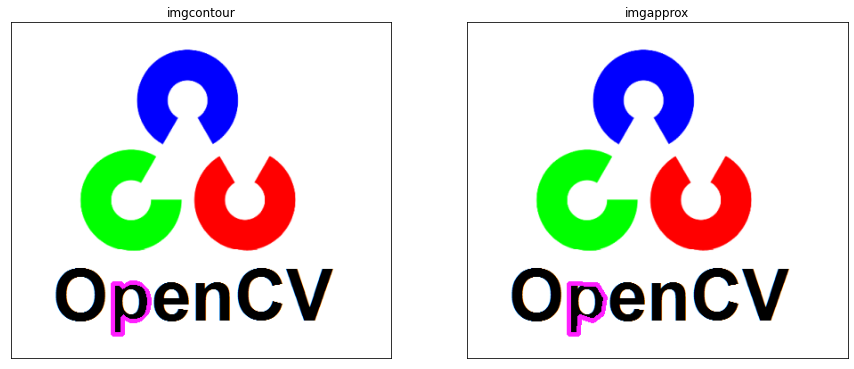

In [38]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgcontour)
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgapprox,cmap = 'gray')
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.show()

In [39]:
hull = cv2.convexHull(approx)

In [40]:
imghull = cv2.imread('opencv.png')
imghull = cv2.drawContours(imghull, [hull], -1, (255,32,255), 3)

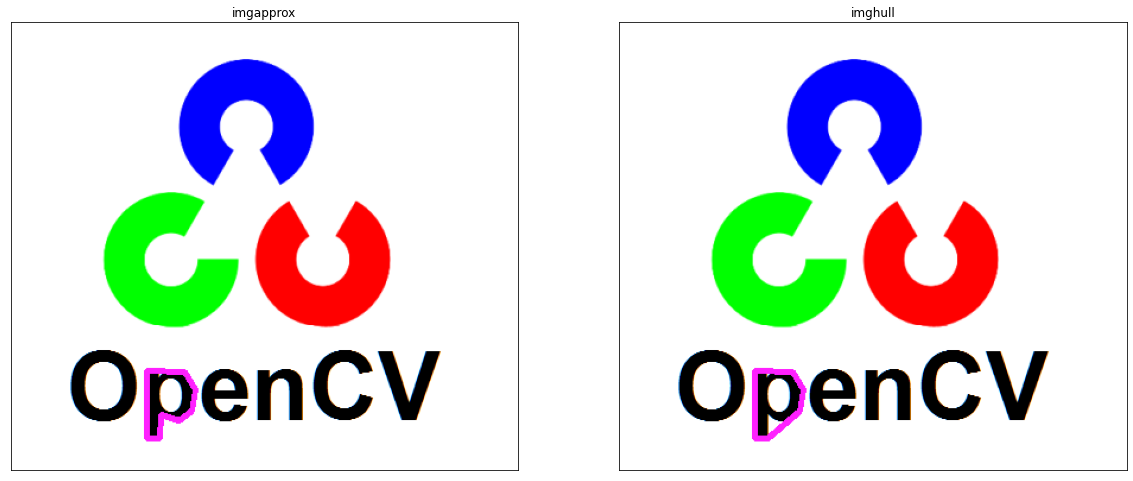

In [41]:
plt.figure(figsize = (20,10))

plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imghull,cmap = 'gray')
plt.title('imghull'), plt.xticks([]), plt.yticks([])
plt.show()

In [42]:
x,y,w,h = cv2.boundingRect(cnt)
imgbox = cv2.imread('opencv.png')
imgbox = cv2.rectangle(imgbox,(x,y),(x+w,y+h),(255,0,0),2)

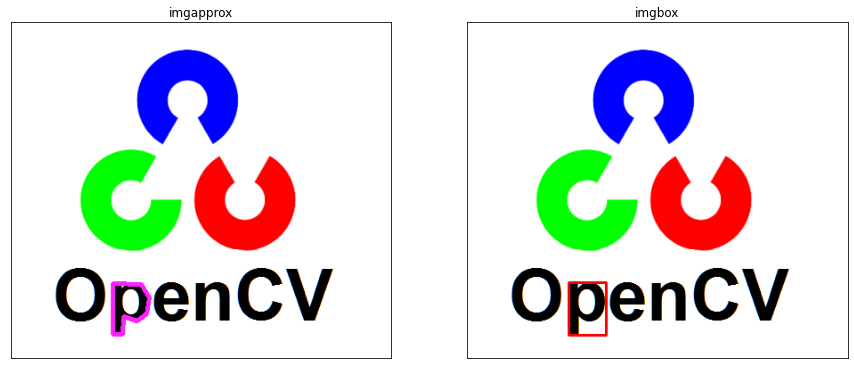

In [43]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgbox,cmap = 'gray')
plt.title('imgbox'), plt.xticks([]), plt.yticks([])
plt.show()

In [44]:
imgcontour = cv2.imread('opencv.png')
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
imgcontour = cv2.drawContours(imgcontour,[box],0,(0,0,255),2)

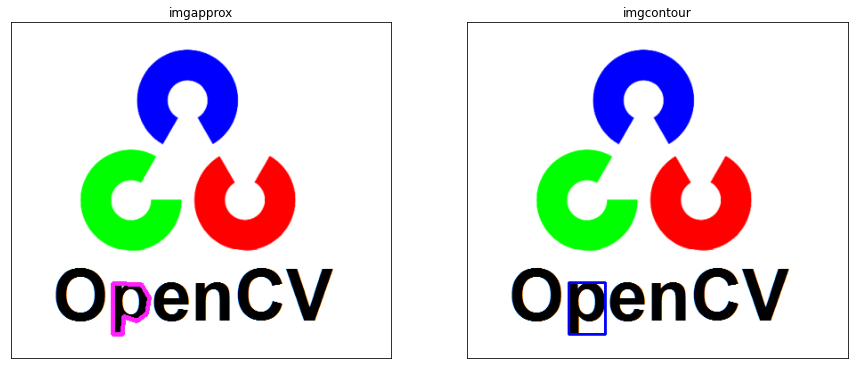

In [45]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgcontour,cmap = 'gray')
plt.title('imgcontour'), plt.xticks([]), plt.yticks([])
plt.show()

In [46]:
cnt = contours[9]
M = cv2.moments(cnt)
print(M)

{'m00': 7239.0, 'm10': 1898715.1666666665, 'm01': 1505439.8333333333, 'm20': 505868986.3333333, 'm11': 394843197.9166666, 'm02': 318281254.6666666, 'm30': 136804001757.65001, 'm21': 105140250741.13333, 'm12': 83475267517.63333, 'm03': 68337049063.65, 'mu20': 7855547.44259876, 'mu11': -18170.235583484173, 'mu02': 5206369.767275214, 'mu30': -1083314.992111206, 'mu21': -51947389.87743616, 'mu12': 928919.9763679504, 'mu03': -18943732.032806396, 'nu20': 0.14990609896305146, 'nu11': -0.0003467395688795744, 'nu02': 0.0993522841373363, 'nu30': -0.00024297316554020574, 'nu21': -0.011651109651380352, 'nu12': 0.00020834441398415065, 'nu03': -0.0042488275087804485}


In [47]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [20]:
area = cv2.contourArea(cnt)

In [22]:
perimeter = cv2.arcLength(cnt,True)

In [52]:
imginfo = cv2.imread('opencv.png')
imginfo = cv2.circle(imginfo,(cx,cy), 5, (0,0,255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = "A"+str(area)+"L"+str(perimeter)
imginfo=cv2.putText(imginfo,msg,(cx,cy), font, 1,(32,32,32),2,cv2.LINE_AA)

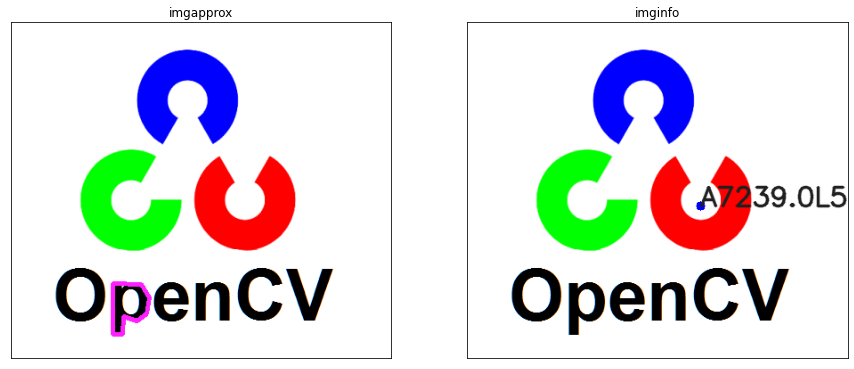

In [53]:
plt.figure(figsize = (15,15))
plt.subplot(1,2,1),plt.imshow(imgapprox)
plt.title('imgapprox'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imginfo,cmap = 'gray')
plt.title('imginfo'), plt.xticks([]), plt.yticks([])
plt.show()